<h1 style="color: #FF8C00;">Portfolio Analysis: Python Challenge</h1>

---

**This challenge** represents a practical tech assignment designed to test your skills in portfolio analysis. Portfolio analysis is a systematic way to evaluate investment portfolios to optimize asset allocation and management. It involves a variety of financial metrics and visualizations to assess the performance and risk of different financial assets.

- In this exercise, you will be required to perform a series of calculations and create visualizations to analyze a set of financial assets.
- Your task is to develop the necessary code to accomplish each of these tasks effectively.
- This challenge is an opportunity to demonstrate your ability to apply Python programming skills in a real-world financial context.

<h1 style="color: #FF8C00;">Libraries</h1>

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [23]:
path_1 = r"C:\Users\elham\OneDrive\Documents\IRONHACK\lab\EDA\asset_price_data.csv"
asset_price_data = pd.read_csv(path_1)
path_2 = r"C:\Users\elham\OneDrive\Documents\IRONHACK\lab\EDA\portfolio_weights.csv"
portfolio_weights_data = pd.read_csv(path_2)
path_3 = r"C:\Users\elham\OneDrive\Documents\IRONHACK\lab\EDA\asset_information_data.csv"
asset_information_data_data = pd.read_csv(path_3)

In [25]:
dfp=asset_price_data.copy()
dfw=portfolio_weights_data.copy()
dfi=asset_information_data_data.copy()

<h1 style="color: #FF8C00;">Exercise 1: Data Loading and Price Charting</h1>

---

You are tasked with loading and analyzing financial data, which is foundational for effective portfolio management. Begin by loading the file named `asset_price_data.csv`, containing essential pricing information for various financial assets.

Post data loading, your objective is to visualize this data through a time series graph.The integrity of your analysis depends heavily on your ability to visualize trends accurately while ensuring all asset price series begin at a uniform value.

<h3 style="color: #FF6347;">Data Loading</h3>

In [7]:
dfp.head(5)

,date,Asset1,Asset2,Asset3,Asset4,Asset5
0,2019-01-02,231.5061,55.875,25.649222,302.93,50.89
1,2019-01-03,231.0356,54.977,25.503047,302.11,50.41
2,2019-01-04,230.4026,56.129,26.147133,301.77,51.38
3,2019-01-07,230.0543,56.838,25.955277,302.33,52.14
4,2019-01-08,229.7012,56.895,26.137997,303.42,52.13


In [39]:
dfw.head(5)

,date,Asset1,Asset2,Asset3,Asset4,Asset5
0,2019-01-02,0.225458,0.116255,0.265003,0.23031,0.162974
1,2019-01-03,0.225458,0.116255,0.265003,0.23031,0.162974
2,2019-01-04,0.225458,0.116255,0.265003,0.23031,0.162974
3,2019-01-07,0.225458,0.116255,0.265003,0.23031,0.162974
4,2019-01-08,0.225458,0.116255,0.265003,0.23031,0.162974


In [41]:
dfi.head(5)

,Name,Family
0,Asset1,Fixed Income
1,Asset2,Fixed Income
2,Asset3,Equity
3,Asset4,Equity
4,Asset5,Alternative


In [9]:
dfp.shape

(783, 6)

## data cleaing for asset_price_data

In [11]:
#checking the Nan
dfp.isnull().sum()

date       0
Asset1    13
Asset2    13
Asset3    13
Asset4    49
Asset5    20
dtype: int64

In [13]:
#data cleaning
dfp.columns = [col.lower().replace(" ", "_") for col in dfp.columns]
dfp.dropna(how='all')
dfp.drop_duplicates(inplace=True)

In [15]:
dfp.isnull().sum()

date       0
asset1    13
asset2    13
asset3    13
asset4    49
asset5    20
dtype: int64

In [17]:
dfp.dtypes

date       object
asset1    float64
asset2    float64
asset3    float64
asset4    float64
asset5    float64
dtype: object

In [19]:
dfp['asset1'].fillna(dfp['asset1'].mean(), inplace=True)
dfp['asset2'].fillna(dfp['asset2'].mean(), inplace=True)
dfp['asset3'].fillna(dfp['asset3'].mean(), inplace=True)
dfp['asset4'].fillna(dfp['asset4'].mean(), inplace=True)
dfp['asset5'].fillna(dfp['asset5'].mean(), inplace=True)

C:\Users\elham\AppData\Local\Temp\ipykernel_21812\3011860523.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfp['asset1'].fillna(dfp['asset1'].mean(), inplace=True)
C:\Users\elham\AppData\Local\Temp\ipykernel_21812\3011860523.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


In [19]:
#alternative to fillna to avoid the future warning
dfp['asset1'] = dfp['asset1'].transform(lambda x: x.fillna(x.mean()))

In [21]:
dfp.isnull().sum()

date      0
asset1    0
asset2    0
asset3    0
asset4    0
asset5    0
dtype: int64

In [27]:
dfw.isnull().sum()

date      0
Asset1    0
Asset2    0
Asset3    0
Asset4    0
Asset5    0
dtype: int64

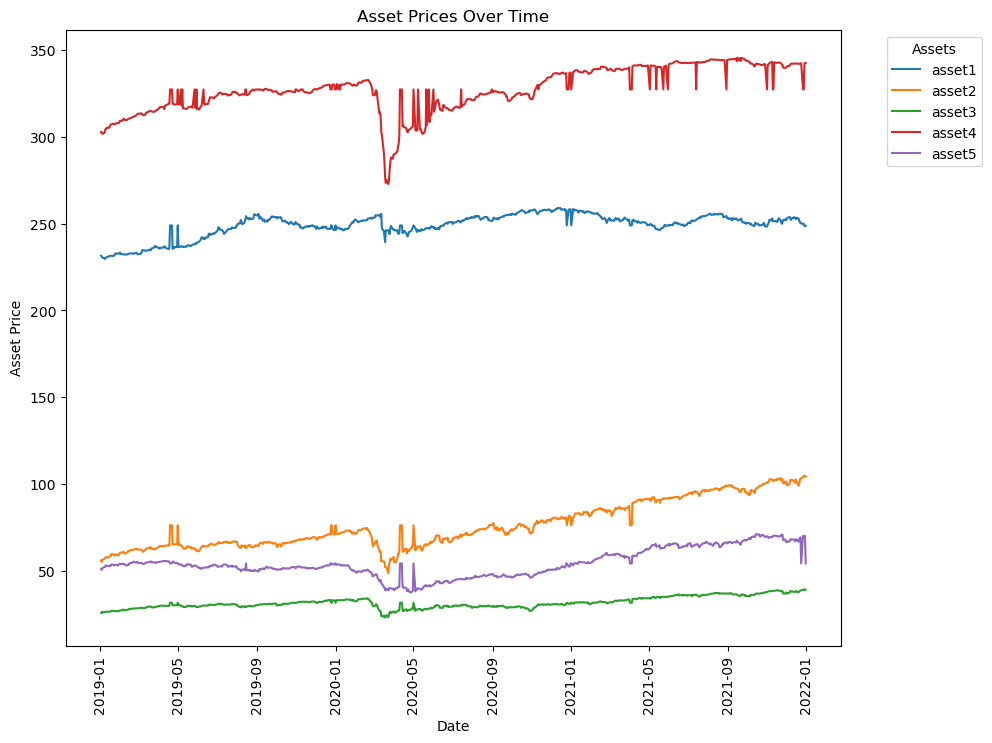

In [215]:
# Plot Asset pricese over time series data
plt.figure(figsize=(10, 8))

for column in dfp.columns: 
    plt.plot(dfp.index, dfp[column], label=column) #date is index

plt.title("Asset Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Asset Price")
plt.legend(title="Assets", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.show()

### insights
Asset 4 (equity) followed by asset 1 (fixed income) illustrated the highest asset prices over 3 years while Asset 3 had the lowest  price. 
Asset 4 had the sharpest dip early 2020
As the scale price of each asset is different, correct comparison between assets are challenging. 

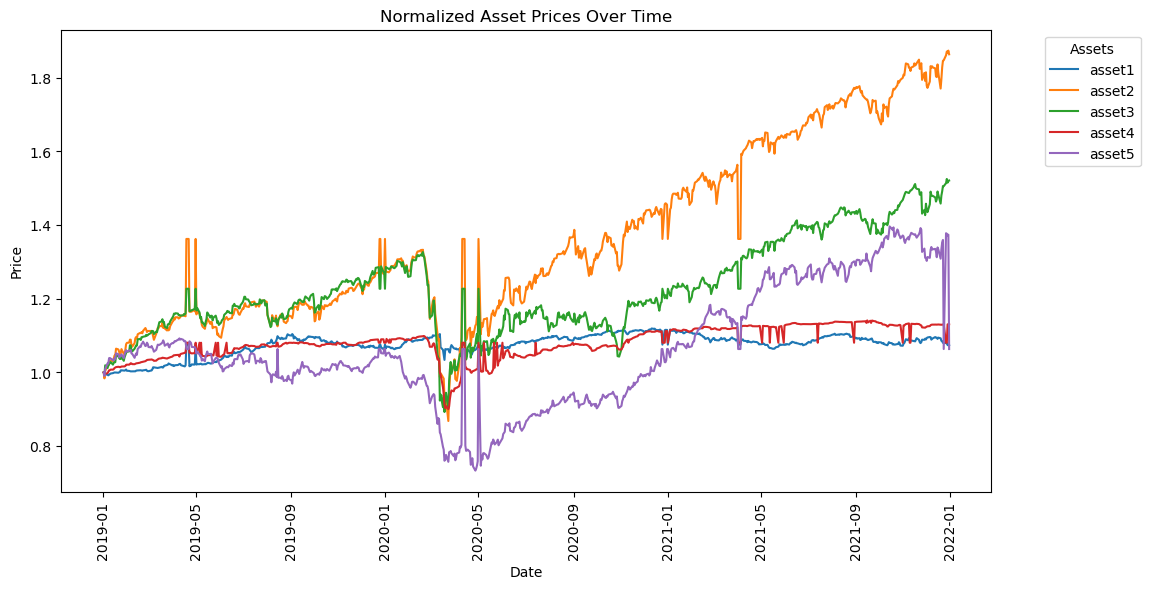

In [217]:
# Normalize each asset's price series to start at 1.0
# Plot each asset's normalized price series
# Divide each column by its first value to normalize data
dfp_normalized = dfp / dfp.iloc[0]  

plt.figure(figsize=(12, 6))

for column in dfp_normalized.columns:
    plt.plot(dfp_normalized.index, dfp_normalized[column], label=column)

plt.title("Normalized Asset Prices Over Time") #Starting at 1
plt.xlabel("Date")
plt.ylabel("Price") #normalized
plt.legend(title="Assets", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.show()


### insights
Normalization of asset prices better demonstrates the changes in asset price and volatility in time series. 
Asset2 and Asset3 showed significant growth, while Asset4 remains relatively stable.
Asset 5 here sees the deepest decline in early 2020. It is evident that in this period, all assets in the market has been affected by an exteranl event (Covide 19) consequently a dip in all asset in 2020-04. 
After mid 2020 all assets gradually recover and grow in their values. 

<h1 style="color: #FF8C00;">Exercise 2: Daily Percentage Returns</h1>

---

You are required to calculate the daily percentage returns for each financial asset. Utilize this data to accomplish the following:
- Calculate the correlation matrix for the five assets.
- Create a scatter plot comparing the returns of two specific assets.

<h2 style="color: #FF6347;">Daily Returns Calculation.</h2>

In [219]:
# calculate daily return and cumulative return from daily return
daily_pct_change = dfp.pct_change() # calculating percentage daily return of each assets 
daily_pct_change.fillna(0, inplace=True)
cumprod_daily_pct_change = (1 + daily_pct_change).cumprod() 
cumprod_daily_pct_change. head(5)

,asset1,asset2,asset3,asset4,asset5
date,,,,,
2019-01-02,1.000000,1.000000,1.000000,1.000000,1.000000
2019-01-03,0.997968,0.983928,0.994301,0.997293,0.990568
2019-01-04,0.995233,1.004546,1.019412,0.996171,1.009629
2019-01-07,0.993729,1.017235,1.011932,0.998019,1.024563
2019-01-08,0.992204,1.018255,1.019056,1.001618,1.024366


<h2 style="color: #FF6347;">Correlation Matrix Calculation.</h2>

In [185]:
dfp.corr()

,asset1,asset2,asset3,asset4,asset5
asset1,1.000000,0.503582,0.369884,0.561244,0.071368
asset2,0.503582,1.000000,0.907379,0.856242,0.825317
asset3,0.369884,0.907379,1.000000,0.855480,0.863161
asset4,0.561244,0.856242,0.855480,1.000000,0.755902
asset5,0.071368,0.825317,0.863161,0.755902,1.000000


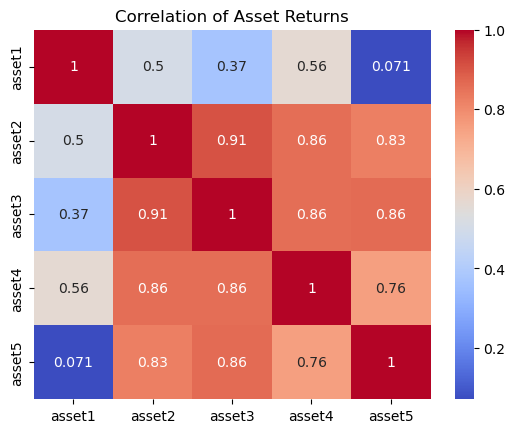

In [187]:
#correlation matrix
corr_dfp=dfp.corr()
sns.heatmap(corr_dfp, annot=True, cmap="coolwarm")
plt.title("Correlation of Asset Returns")
plt.show()

### insights
Asset2, asset3, and asset4 have very high correlations with each other. This implies that having all three assets in one portfolio is risky as one factor affects all three assets is the same manner which can cause the sharp loss of values. 
The highest correlation is between asset 2 and 3 with 0.91. This mean that the movement of these two assets are aligned with each other. Although one is fixed income and another in equity, they may be in the similar sector which can be included by the same drivers in the market. 

<h2 style="color: #FF6347;">Scatter Plot between the Returns of Two Assets.</h2>

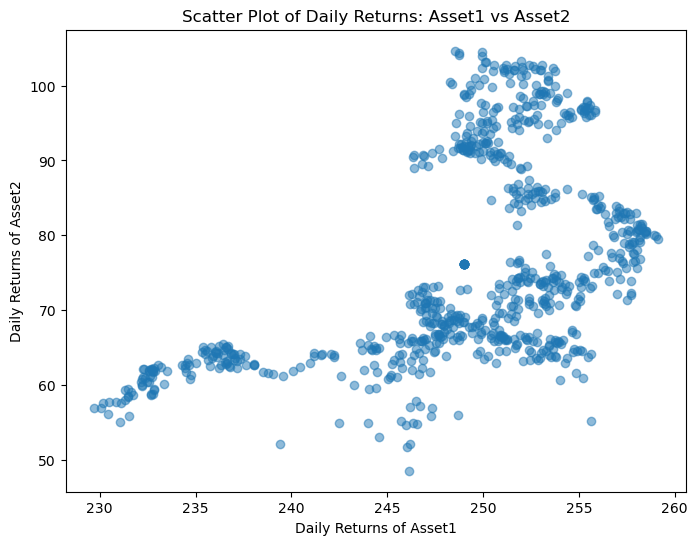

In [189]:
#Scattered plot between Asset 1 and Asset 2
plt.figure(figsize=(8, 6))
plt.scatter(dfp['asset1'], dfp['asset2'], alpha=0.5)
plt.xlabel("Daily Returns of Asset1")
plt.ylabel("Daily Returns of Asset2")
plt.title("Scatter Plot of Daily Returns: Asset1 vs Asset2")
plt.show()

### insights
The data point of asset 1 and 2 are very scattered and this can indicate that there is weak correlation among these two assests. 
Heatmap showed a correlation of 0.5 which is relatively moderate. 
As the return of these assets are not correlated it can benefitial to include these two assets in the portfolio. 

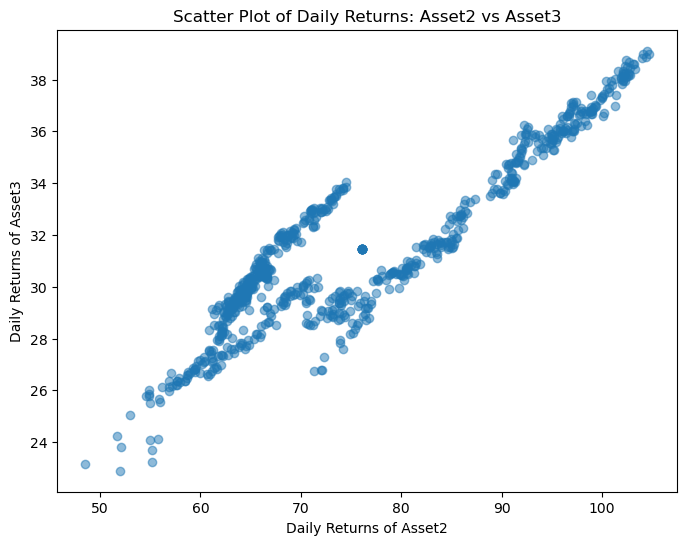

In [195]:
#Scattered plot between Asset 2 and Asset 3
plt.figure(figsize=(8, 6))
plt.scatter(dfp['asset2'], dfp['asset3'], alpha=0.5)
plt.xlabel("Daily Returns of Asset2")
plt.ylabel("Daily Returns of Asset3")
plt.title("Scatter Plot of Daily Returns: Asset2 vs Asset3")
plt.show()

### insights
The scattered plot between asset 2 and 3 illustrates a relatively strong linear relationshiop between returns of these two assets. 
The returns of these two assets are highly correlated with correlation coefficient of 0.91. 

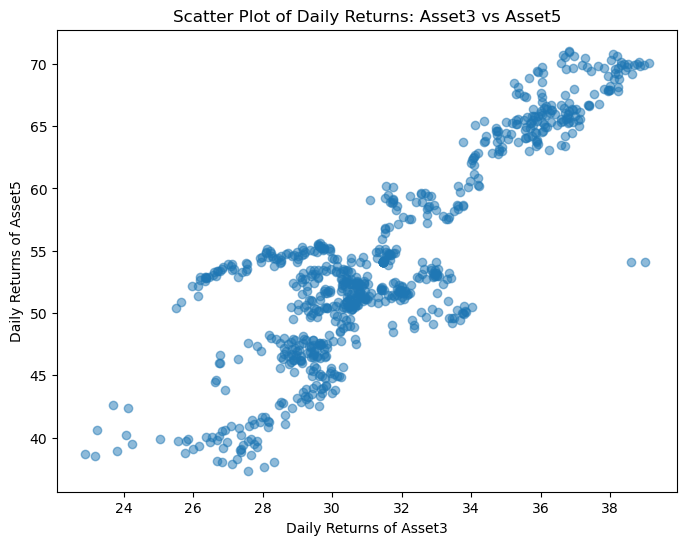

In [207]:
plt.figure(figsize=(8, 6))
plt.scatter(dfp['asset3'], dfp['asset5'], alpha=0.5)
plt.xlabel("Daily Returns of Asset3")
plt.ylabel("Daily Returns of Asset5")
plt.title("Scatter Plot of Daily Returns: Asset3 vs Asset5")
plt.show()

<h1 style="color: #FF8C00;">Exercise 3: Portfolio Analysis</h1>

---

This third exercise focuses on calculating and analyzing the performance of a portfolio. Begin by loading the file named `portfolio_weights.csv`, which contains the daily weights of each asset in the portfolio.

To complete the exercise, you will need to perform the following tasks:
- Create an area chart of the asset weights.
- Plot the historical cumulative returns of the portfolio.
- Calculate the annualized return of the portfolio.
- Determine the annualized volatility of the portfolio (using an annualization factor of 261 days).
- Produce an area chart grouping asset weights by their categories, as detailed in the `asset_information_data.csv`.

<h2 style="color: #FF6347;">Area Chart of Asset Weights.</h2>

<Figure size 1200x600 with 0 Axes>

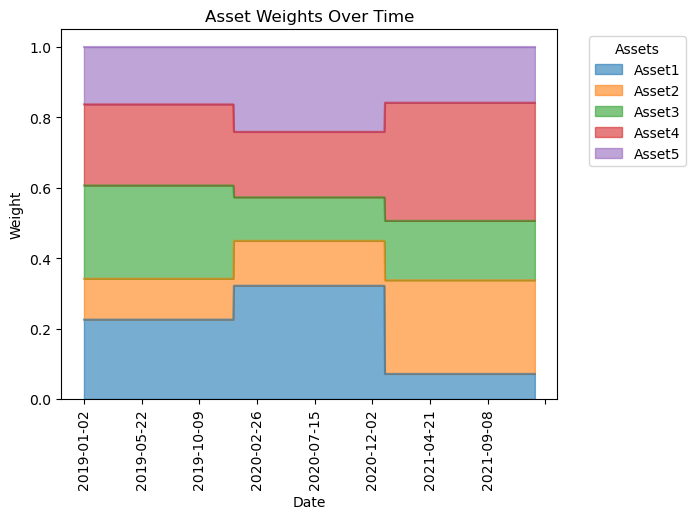

In [181]:
plt.figure(figsize=(12, 6))
dfw.set_index('date').plot.area(stacked=True, alpha=0.6)
plt.title("Asset Weights Over Time")
plt.xlabel("Date")
plt.ylabel("Weight")
plt.legend(title="Assets", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.show()

### insight on weight of assets
This graph illustrates the distribution of assets in the portfolio based their respective weights. 
Weights per asset over time has changed which could be as a strategy to minimize the risks. 
Asset 1 in 2019 started with higheest weight which eventully reduced in 2021. 

<h2 style="color: #FF6347;">Chart of Historical Cumulative Returns of the Portfolio.</h2>

In [95]:
# calculate daily return and cumulative return from daily return
daily_pct_change = dfp.pct_change()
daily_pct_change.fillna(0, inplace=True)
cumprod_daily_pct_change = (1 + daily_pct_change).cumprod()
cumprod_daily_pct_change.tail()

,asset1,asset2,asset3,asset4,asset5
date,,,,,
2021-12-27,1.079543,1.860510,1.513496,1.080635,1.377677
2021-12-28,1.079612,1.870711,1.524997,1.080635,1.376105
2021-12-29,1.074363,1.867740,1.514861,1.130492,1.371782
2021-12-30,1.073615,1.873163,1.519929,1.130789,1.373747
2021-12-31,1.074505,1.863195,1.520709,1.130921,1.063533


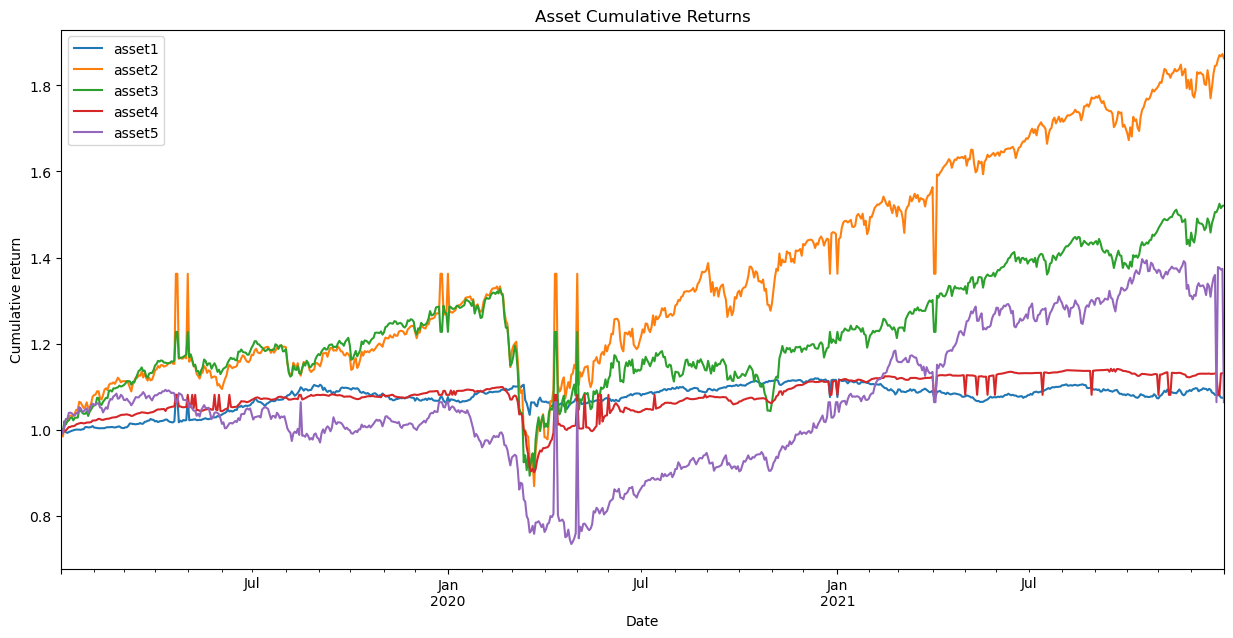

In [115]:
%matplotlib inline
fig = plt.figure(figsize=(15, 7))
ax1 = fig.add_subplot(1, 1, 1)
cumprod_daily_pct_change.plot(ax=ax1)
ax1.set_xlabel('Date')
ax1.set_ylabel('Cumulative return')
ax1.set_title('Asset Cumulative Returns')
plt.show()

### insights
This graph shows the cumulative returns of multiple assets in the porfolio. 
Asset 2 and 3 illustrate increase over time and have high volatility specially before January 2021, due to market conditions, while they showed overall increase afterwards suggesting they are more responsive to the positive condition of the market.
Asset 1 and 4 demonstrates stable movements and lower volitility which means there is low risk and low return for these assets. 
Asset 5 showed more volitile movements specially dips between Jan 2020 and July 2021 and later in early 2022 suggest lower return of this asset. 
A well diversified portfolio can have a combination of assets that have no correlation, some with higher risk and some with lower volitility. 

<h2 style="color: #FF6347;">Annualized Return.</h2>

In [179]:
#Annualized Return is calculated based on formula:
#Annualized Return=(Ending Portfolio Value/ Starting Portfolio Value) ^ (Number of Trading Days in a Year/Total Number of Days) -1

# calculating total number of days
total_days = len(cumprod_daily_pct_change)

# extract the cumulative return of the portfolio's last day (ending value)
ending_value = cumprod_daily_pct_change.iloc[-1].mean()

# extract the starting portfolio value
starting_value = 1  # cumulative return should starts at 1

# annualized return formula
annualized_return = (ending_value / starting_value) ** (261 / total_days) - 1

print(f"Annualized return of portfolio:", annualized_return)


Annualized return of portfolio: 0.09988224992440786


<h2 style="color: #FF6347;">Annualized Volatility.</h2>

In [177]:
#Annualized Volatility=Daily Volatility× square root of Number of trading days in a year

# avergae of standard deviation of daily returns to calculate daily volatility
daily_volatility = daily_pct_change.std().mean()  # Standard deviation of daily returns

#annualization (square root of 261 trading days)
square_root = math.sqrt(261)

# annualized volatility
annualized_volatility = daily_volatility * square_root

print(f"Annualized volatility:", annualized_volatility)


Annualized volatility: 0.2868823833817346


<h2 style="color: #FF6347;">Area Chart of Asset Weights Grouped by Family.</h2>

<Figure size 1200x600 with 0 Axes>

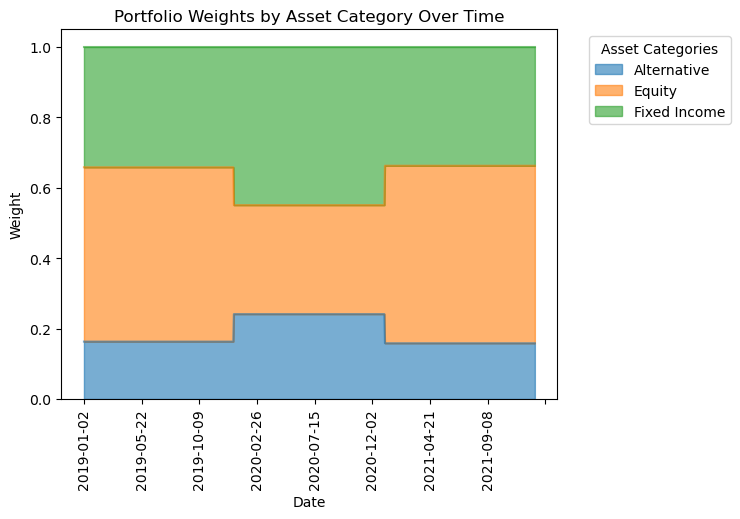

In [183]:
# Transpose dfw to align with key
weights_by_asset = dfw.set_index('date').T

# Merge asset information with weights data
weights_by_asset = weights_by_asset.merge(dfi.set_index('Name'), left_index=True, right_index=True)

# Group by family
weights_by_category = weights_by_asset.groupby('Family').sum().T

plt.figure(figsize=(12, 6))
weights_by_category.plot.area(stacked=True, alpha=0.6)
plt.title("Portfolio Weights by Asset Category Over Time")
plt.xlabel("Date")
plt.ylabel("Weight")
plt.legend(title="Asset Categories", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.show()

### insights
The chart illustrates the distribution of the portfolio across three asset categories of fixed income, equity and alternative Overall equity has the major share of area, except from period from end of 2019 to early 2021 which can be as a result of market condition (Covid 19) Alternatives had the lowest share around 20%. To reduce the risk in the unstable period of end of 2019 beginnng of 2021, the portfolio strategy was focused on reduce the riskier asset which is equity and invest in more stable assets of fixed income and alternatives. After this period, the strategy was aligned to invest in more riskier asset (equity) in expectation of higher return.